# Merk at dette bare er et _løsningsforslag_. Det finnes mange forskjellige måter å løse oppgavene på.

# Yatzy, del (a): tilfeldig kast

I denne oppgaven skal du skrive noen funksjoner til spillet Yatzy. I Yatzy spiller man med 5 terninger der målet er å få høyest poengsum på ulike sammensetninger av terninger som ett par, to par, tre like, fire like, liten straight, stor straight, hus, sjanse og yatzy.

**(a)** Skriv en funksjon throw(n). Funksjonen har som parameter antall terninger som skal kastes (int) og skal returnere en liste med heltall som viser de verdiene terningene tilfeldigvis fikk. Eksempel på kjøring:

```shell
>>> throw(5)

[2, 1, 5, 6, 1]

>>> throw(2)

[5, 5]

>>> throw(1)

[2]
```

NB: tallene som returneres skal trekkes tilfeldig, det må ikke være faste tall som du finner på.

In [1]:
from random import randint

def throw(n):
    tilfeldige_tall = []
    for i in range(n):
        tilfeldige_tall.append(randint(1, 6))
    return tilfeldige_tall

# Eventuelt
def throw2(n):
    return [randint(1, 6) for _ in range(n)]

Test:

In [2]:
print(throw(5))
print(throw(2))
print(throw(1))

[2, 3, 3, 6, 3]
[2, 1]
[4]


**(b)** Lag en funksjon for å beregne score på "sjanse" i Yatzy, som rett og slett er summen av de fem terningene man har kastet. Funksjonen **chance()** skal ha parameteren **dice** som er en liste med fem terningverdier (int) i området 1 - 6. Funksjonen skal returnere summen av tallene. **NB: I denne spesielle oppgaven er det ikke lov å bruke den innebygde funksjonen sum() for å finne summen av tallene i lista, det skal skrives en løkke som går gjennom lista og legger til ett og ett tall.**
Eksempel på kjøring:

```shell
>>> chance([5, 2, 6, 3, 3])

19

>>> chance([3, 1, 6, 1, 6])

17
```

In [3]:
def chance(dice):
    summen = 0
    for elem in dice:
        summen += elem
    return summen

Test:

In [4]:
print(chance([5, 2, 6, 3, 3]))
print(chance([3, 1, 6, 1, 6]))

19
17


**c)** I terningspillet Yatzy er "yatzy" hvis man får samme tall på alle de 5 terningene. Lag en funksjon **yatzy(dice)** som returnerer 75 hvis man har 5 seksere, 50 hvis man har fem like av et lavere tall enn 6, og 0 hvis man ikke har fem like.

Test cases:

| Test case # | Input       | Forventet output |
|-------------|-------------|------------------|
| 1           | [6,6,6,6,6] | 75               |
| 2           | [3,3,3,3,3] | 50               |
| 3           | [3,3,3,3,2] | 0                |

In [5]:
def yatzy(dice):
    if len(dice) != 5: # Tilfelle vi ikke har 5 terninger. Det er da ugyldig
        return -1
    
    dice = set(dice)
    if len(dice) == 1:
        if 6 in dice:
            return 75
        return 50
    return 0    

Test:

In [6]:
print(yatzy([6,6,6,6,6]))
print(yatzy([3,3,3,3,3]))
print(yatzy([3,3,3,3,2]))
print(yatzy([5,5,5,5,5]))
print(yatzy([4,4,4,4,4]))
print(yatzy([2,2,2,2,2]))
print(yatzy([1,1,1,1,1]))

75
50
0
50
50
50
50


**d)** I yatzy er "liten straight" hvis man på de 5 terningene har fått tallene 1, 2, 3, 4, 5 og "stor straight" er hvis man har fått tallene 2, 3, 4, 5, 6.

**Oppgave:** Lag en funksjon **straight(dice)** som får inn som parameter ei liste med fem heltall, og som returnerer tallet 15 hvis det er liten straight, 20 hvis det er stor straight, 0 hvis det verken er liten eller stor straight. Merk: Tallene kan komme i tilfeldig rekkefølge i lista som kommer inn som parameter.

Test cases:

| Test case # | Input       | Forventet output |
|-------------|-------------|------------------|
| 1           | [1, 2, 3, 4, 5] | 15               |
| 2           | [5, 2, 3, 1, 4] | 15               |
| 3           | [2, 3, 4, 5, 6] | 20                |
| 4           | [3,  2, 5, 4, 6] | 20                |
| 5           | [1, 2, 3, 4, 6] | 0                |


In [7]:
def straight(dice):
    liten = [1,2,3,4,5]
    stor = [2,3,4,5,6]
    
    if sorted(dice) == liten:
        return 15
    elif sorted(dice) == stor:
        return 20
    return 0

Test:

In [8]:
print(straight([1, 2, 3, 4, 5]))
print(straight([5, 2, 3, 1, 4]))
print(straight([2, 3, 4, 5, 6]))
print(straight([3, 2, 5, 4, 6]))
print(straight([1, 2, 3, 4, 6]))

15
15
20
20
0


**(c)** Lag funksjonen **house(dice)** som har parameteren **dice** som er en liste med fem heltall 1-6. Funksjonen skal returnere summen av alle terningene **hvis** verdiene i dice har både 3 like og ett par (f.eks. 4,4,4,2,2 eller 1,1,6,6,6), **ellers** skal verdien 0 returneres. Funksjonen skal også returnere verdien 0 hvis alle elementene i dice er like. Eksempel på kjøring av funksjonen og hva den returnerer:

```shell
>>> house([1,3,1,1,3])

9

>>> house([4,3,3,3,4])

17

>>> house([2,2,2,2,2])

0

>>> house([1,3,4,2,3])

0
```

Test cases:
    
| Test case # | Input       | Forventet output |
|-------------|-------------|------------------|
| 1           | 	[1,3,1,1,3] | 9               |
| 2           | [4,3,3,3,4] | 17               |
| 3           | [2,2,2,2,2] | 0                |
| 4           | [1,3,4,2,3] | 0               |
| 5           | [4,4,4,4,5] | 0                |


In [9]:
def house(dice):
    if len(set(dice)) != 2 or len(set(dice)) == 1: 
        # Dersom det ikke er kun 2 ulike tall i listen kan det ikke være house. 
        # Funksjonen skulle også returnere 0 dersom det kun var samme element i listen
        return 0
    
    dice = sorted(dice)
    is_house = len(set(dice[0:3])) == 1 and len(set(dice[3:])) == 1 or len(set(dice[0:2])) == 1 and len(set(dice[2:])) == 1
    if is_house: # Det er house
        return chance(dice) # evt sum(dice)
    return 0 # Det er ikke house

Test:

In [10]:
print(house([1,3,1,1,3]))
print(house([4,3,3,3,4]))
print(house([2,2,2,2,2]))
print(house([1,3,4,2,3]))
print(house([4,4,4,4,5]))

9
17
0
0
0


# Tall til sifre / Number to digits (5%)

Vi ønsker en funksjon som skal få inn som argument et heltall, og returnere ei liste med sifrene i heltallet. Eksempel:

- 0 som argument skal gi lista [0] i retur
- 65 som argument skal gi lista [6, 5] i retur
- 1244 som argument skal gi lista [1, 2, 4, 4] i retur

Du kan anta at argumentet som gis inn til funksjonen alltid er et heltall >= 0.

Nedenfor er to varianter av denne funksjonen, **list_of_digits_V1()** og **list_of_digits_V2()**. Begge skal gjøre akkurat det samme, bare på ulike måter. **Trekk kodefragmentene til riktig posisjon slik at begge funksjonene virker som forklart over.**

In [11]:
def list_of_digits_V1(num):
    L = []
    for ch in str(num):
        L.append(int(ch))
    return L

def list_of_digits_V2(num):
    if num == 0:
        return [0]
    else:
        L = []
    while num > 0:
        L.append(num % 10)
        num = num // 10
    L.reverse()
    return L

Test:

In [12]:
print(list_of_digits_V1(0))
print(list_of_digits_V1(65))
print(list_of_digits_V1(1244))

print(list_of_digits_V2(0))
print(list_of_digits_V2(65))
print(list_of_digits_V2(1244))

[0]
[6, 5]
[1, 2, 4, 4]
[0]
[6, 5]
[1, 2, 4, 4]


# Sjekke matrise / Check matrix

Funksjonen **is_unit_matrix(A)** skal sjekke om **A** - en matrise representert som en liste av lister - er en enhetsmatrise eller ikke. En enhetsmatrise er en matrise hvor

- antall rader er lik antall kolonner
- alle tall i diagonalen fra øvre venstre til nedre høyre hjørne er 1. 
- alle øvrige tall er 0

Funksjonen skal returnere **True** hvis **A** er en enhetsmatrise, ellers **False**. 

 

Eksempler på kjøring:

```shell
>>> is_unit_matrix([[1,0,0], [0,1,0], [0,0,1]])
True

>>> is_unit_matrix([[2,0,3], [1,2,3], [3,4,5]])
False
```

Eksemplene viser matriser med 3 rader og 3 kolonner, men det kan være et vilkårlig antall rader og kolonner i matriser som gis inn til funksjonen. Du kan imidlertid anta at det alltid gis inn en matrise som kun består av heltall.

**Oppgave**: Under vises kode for funksjonen **is_unit_matrix()**. Fyll inn det som mangler slik at funksjonen virker som beskrevet ovenfor.

In [13]:
def is_unit_matrix(A):
    rows = len(A)
    for i in range(rows):
        if A[i] != [0] * i + [1] + [0] * (rows - i - 1):
            return False
    return True

Test:

In [14]:
print(is_unit_matrix([[1,0,0], [0,1,0], [0,0,1]]))
print(is_unit_matrix([[2,0,3], [1,2,3], [3,4,5]]))

True
False


# Trappesteg 

Vi ønsker å lage en funksjon som får inn matriser i form av todimensjonale lister i Python og sjekker om  de tilfredsstiller følgende krav: 

(i) matrisen må være kvadratisk, dvs. alle kolonner har like mange element som antall rader, 

(ii) alle elementer under diagonalen er lik 0, 

(iii) alle  elementer i diagonalen må være **ulik** 0. F.eks.  gitt matrisene


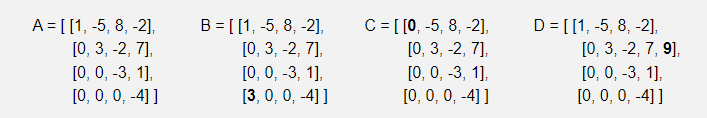

 

så vil A tilfredsstille disse kravene, mens B, C og D ikke gjør det (tallet vist med fet skrift indikerer avviket fra reglene).

 

Nedenfor er vist nesten ferdig kode for en funksjon som kan sjekke om en matrise tilfredsstiller kravene. Den skal returnere **True** for korrekte matriser, ellers **False**.

 

Fyll inn riktig kode der det mangler noe, slik at funksjonen vil virke som forutsatt.

In [15]:
def check_echelon(M):
    rows = len(M)
    for i in range(rows):
        if len(M[i]) != rows or M[i][i] == 0:
            return False
        elif M[i][0:i] != [0] * i:
            return False 
    return True

Test:

In [16]:
print(check_echelon([[1, -5, 8, -2], [0, 3, -2, 7], [0, 0, -3, 1], [0, 0, 0, -4]]))
print(check_echelon([[1, -5, 8, -2], [0, 3, -2, 7], [0, 0, -3, 1], [3, 0, 0, -4]]))
print(check_echelon([[0, -5, 8, -2], [0, 3, -2, 7], [0, 0, -3, 1], [0, 0, 0, -4]]))
print(check_echelon([[1, -5, 8, -2], [0, 3, -2, 7, 9], [0, 0, -3, 1], [0, 0, 0, -4]]))

True
False
False
False


# Kopi av Looping in 2D lists / Løkker i 2D lister

**POENG: På dette spørsmålet får du +0.5 poeng per korrekt svar, -0.25 poeng per blankt eller ukorrekt svar.**

Funksjonen **seq_in_tab()** skal ta to argumenter, pluss et valgfritt tredje argument. Funksjonen sjekker om en sekvens av tall  (det første argumentet) fins ved radvis gjennomgang av ei 2D liste (andre argument). For illustrasjon av hvordan funksjonen virker, anta at vi har følgende:


![Screenshot_1.png](attachment:image.png)


Med disse dataene, skal funksjonen **seq_in_tab()** gjøre som følger:

- **seq_in_tab(S0,M)** skal returnere **False** (sekvensen 0,1,2 fins ikke i M)
- **seq_in_tab(S1, M)** skal returnere **True** (1,2,3 fins i en av radene til M)
- **seq_in_tab(S2, M)** skal returnere **False** (3,4,4 fins ikke, bare 3,4)
- **seq_in_tab(S3, M)** skal returnere False. (7,8,10,12 fins, men bare hvis man slår sammen flere rader). Men, dersom vi gir inn det tredje argumentet som True:
- **seq_in_tab(S3, M, True)** skal returnere **True**. Dvs., å gi inn det tredje argumentet som True, innebærer at funksjonen skal akseptere også sekvenser som går over flere linjer.
- **seq_in_tab(S4, M, True)** skal returnere **False**. Selv om alle tallene fins i M, står de ikke ved siden av hverandre. Dvs., for å være akseptabel må en sekvens finnes ved radvis gjennomgang av 2D-lista, ikke kolonnevis.

**Oppgave: Velg alternativer for det som mangler i koden under slik at funksjonen virker som forklart over.**

In [33]:
def seq_in_tab(S, M, wrap=False):
    ct = 0
    for i in range(len(M)):
        for j in range(len(M[i])):
            if M[i][j] in S:
                ct += 1
                if ct == len(S):
                    return True
            else:
                ct = 0
        if not wrap:
            return False
    return False

Test:

In [35]:
M = [[1,2,3,4], [5,6,7,8], [10, 12, 0, 14]]
S0 = [0,1,2]
S1 = [1,2,3,4]
S2 = [3,4,4]
S3 = [7,8,10,12]
S4 = [3,7,0]

print(seq_in_tab(S0, M))
print(seq_in_tab(S1, M))
print(seq_in_tab(S2, M))
print(seq_in_tab(S3, M))
print(seq_in_tab(S3, M, True))
print(seq_in_tab(S4, M, True))

False
True
False
False
True
False


# Strengelek 2

Funksjonen **f(streng)** får inn som parameter en **streng av vilkårlig lengde**. Alle tegn i strengen kan antas å være små bokstaver i det latinske alfabetet, dvs. 'a' - 'z' . Funksjonen skal

- returnere en streng med de samme tegnene, men
- i den returnerte strengen skal tegn som er identiske med tegnet rett foran være fjernet, slik at det aldri kommer to like tegn rett etter hverandre. F.eks.
  - 'abcda' -> 'abcda'
  - 'aabcabbbbccbbc' -> 'abcabcbc'
  
Test cases:

| Test case # | Input       | Forventet output |
|-------------|-------------|------------------|
| 1           | a | a               |
| 2           | abcda | abcda               |
| 3           | abbcddaabba | abcdaba                |
| 4           |aabbbbcddaa | abcda               |

In [90]:
def f(streng):
    if len(streng) == 0:
        return ''
    
    st = streng[0]
    i = 1
    while i < len(streng):
        j = i
        lengde = 1
        while streng[j] == st[-1] and j < len(streng) - 1:
            j += 1
            lengde += 1
        st += streng[j] if streng[j] != st[-1] else ''
        i += lengde
    
    return st

Test:

In [91]:
print(f('a'))
print(f('abcda'))
print(f('abbcddaabba'))
print(f('aabbbbcddaa'))

a
abcda
abcdaba
abcda


# Tekst for tall, del (a): to siffer

Firmaer som setter opp kjøpskontrakter har ofte behov for å oppgi beløpet som skal betales både med tall og tekst. Store beløp blir en lang tekst og ansatte har lett for å skrive feil slik at tall og tekst ikke stemmer overens. Man ønsker derfor et program som automatisk kan oversette tall til tekst. I denne oppgaven skal tallene omformes til engelsk tekst.

Du kan anta at det ordboka D allerede er opprettet som en global variabel som du kan benytte deg av i koden din hvis du ønsker det. Den har innholdet:

- D = {0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine', 10: 'ten', 11: 'eleven', 12: 'twelve', 13: 'thirteen', 14: 'fourteen', 15: 'fifteen', 16: 'sixteen', 17: 'seventeen', 18: 'eighteen', 19: 'nineteen', 20: 'twenty', 30: 'thirty', 40: 'forty', 50: 'fifty', 60: 'sixty', 70: 'seventy', 80: 'eighty', 90: 'ninety'}

**(a):** Skriv en funksjon **i2_txt(tall)** som kan ta som argument et positivt heltall med maksimalt to siffer, og som returnerer tallet som tilsvarende engelsk tekst. Eksempel på kjøring:

```shell
>>> i2_txt(5)

'five'

>>> i2_txt(30)

'thirty'

>>>i2_txt(68)

'sixty-eight'
```

Test cases:

| Test case # | Input       | Forventet output |
|-------------|-------------|------------------|
| 1           | 5 | five               |
| 2           | 30 | thirty               |
| 3           | 68 | sixty-eight                |

In [121]:
D = {
    0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine', 
    10: 'ten', 11: 'eleven', 12: 'twelve', 13: 'thirteen', 14: 'fourteen', 15: 'fifteen', 16: 'sixteen', 17: 'seventeen', 
    18: 'eighteen', 19: 'nineteen', 20: 'twenty', 30: 'thirty', 40: 'forty', 50: 'fifty', 60: 'sixty', 70: 'seventy',
    80: 'eighty', 90: 'ninety'
}

def i2_txt(tall):
    if tall <= 20:
        return D[tall]
    
    tier = tall // 10 * 10
    ener = tall % 10
    if tier == 0:
        return D[ener]
    if ener == 0:
        return D[tall]
    
    return D[tier] + '-' + D[ener]

Test:

In [122]:
print(i2_txt(5))
print(i2_txt(30))
print(i2_txt(68))
print(i2_txt(12))

five
thirty
sixty-eight
twelve


**(b):** Skriv en funksjon i3_txt(tall) som kan ta som argument et positivt heltall med maksimalt 3 siffer, og som returnerer tallet som tilsvarende engelsk tekst. Eksempel på kjøring:

```shell
>>>i3_txt(68)

'sixty-eight'

>>>i3_txt(100)

'one hundred'

>>>i3_txt(345)

'three hundred forty-five'
```

Hvis tallet har to eller færre siffer, skal funksjonen virke på samme måte som den forrige i2_txt(), og hvis du vil, kan du kopiere løsningen din fra oppgave (a) og bruke videre som del av løsningen på oppgave (b).

Test cases:

| Test case # | Input       | Forventet output |
|-------------|-------------|------------------|
| 1           | 68 | sixty-eight               |
| 2           | 100 | one hundred               |
| 3           | 345 | three hundred forty-five                |

In [127]:
D = {
    0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine', 
    10: 'ten', 11: 'eleven', 12: 'twelve', 13: 'thirteen', 14: 'fourteen', 15: 'fifteen', 16: 'sixteen', 17: 'seventeen', 
    18: 'eighteen', 19: 'nineteen', 20: 'twenty', 30: 'thirty', 40: 'forty', 50: 'fifty', 60: 'sixty', 70: 'seventy',
    80: 'eighty', 90: 'ninety'
}

def i3_txt(tall):
    if len(str(tall)) <= 2:
        return i2_txt(tall)
    
    hundre = tall // 100
    
    if tall % 100 == 0:
        return D[hundre] + ' hundred'
    
    return D[hundre] + ' hundred' + ' ' + i2_txt(tall - hundre*100) 

Test:

In [109]:
print(i3_txt(68))
print(i3_txt(100))
print(i3_txt(345))

sixty-eight
one hundred
three hundred forty-five


# Tekst for tall, del (c): 9 siffer

**(c):** Skriv en funksjon **i9_txt(tall)** som kan ta som argument et positivt heltall med maksimalt ni siffer (dvs. 1 <= tall <= 999999999), og som returnerer tilsvarende engelsk tekst for tallet. Eksempel på kjøring:

```shell
>>> i9_txt(12000)

'twelve thousand'

>>> i9_txt(276900)

'two hundred seventy-six thousand nine hundred'

>>> i9_txt(67000020)

'sixty-seven million twenty'
```
 

Hvis du vil, kan du kopiere koden din for i2_txt() og i3_txt() fra de foregående deloppgavene inn og bruke som hjelpefunksjoner i løsningen for denne oppgaven. Du kan også anta at det allerede er opprettet som globale variable en ordbok D (som nevnt tidligere) og et tuppel T. Innholdet i T er:

- T = (1000000, ' million', 1000, ' thousand', 1, '')
- bakerste element i T er tom streng, strengene på indeks 1 og 3 starter med mellomrom

Det er opp til deg om du ønsker å bruke D og T i løsningen din eller ikke.

In [212]:
D = {0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
6: 'six', 7: 'seven', 8: 'eight', 9: 'nine', 10: 'ten',
11: 'eleven', 12: 'twelve', 13: 'thirteen', 14: 'fourteen',
15: 'fifteen', 16: 'sixteen', 17: 'seventeen',
18: 'eighteen', 19: 'nineteen', 20: 'twenty', 30: 'thirty',
40: 'forty', 50: 'fifty', 60: 'sixty', 70: 'seventy',
80: 'eighty', 90: 'ninety'}
T = (1000000, ' million', 1000, ' thousand', 1, '')

def i9_txt(tall):
    if len(str(tall)) <= 3:
        return i3_txt(tall)
    
    final_st = ''
    million = tall // T[0]
    
    if million != 0:
        final_st += i3_txt(million) + T[1] + ' '
    
    tall = tall % T[0]
    thousand = tall // T[2]
    
    if thousand != 0:
        final_st += i3_txt(thousand) + T[3] + ' '
        
    tall = tall % T[2]
    
    if tall == 0:
        return final_st if final_st[-1] != ' ' else final_st[:-1]
    
    final_st = final_st + i3_txt(tall)
    return final_st if final_st[-1] != ' ' else final_st[:-1]

Test:

In [133]:
print(i9_txt(12000))
print(i9_txt(276900))
print(i9_txt(67000020)) 

twelve thousand
two hundred seventy-six thousand nine hundred
sixty-seven million twenty


# Strengelek 3

Funksjonen **f(streng)** får inn som parameter en **streng av vilkårlig lengde**. Alle tegn i strengen kan antas å være små bokstaver i det latinske alfabetet, dvs. 'a' - 'z' . Funksjonen skal

- returnere en streng med de samme tegnene, men hvor
- hver forekomst av tegnet 'a' i strengen skal bli doblet, bortsett fra hvis det allerede sto to eller flere 'a''er på rad
- hver forekomst av tegnet 'b' i strengen skal bli triplet, med mindre det allerede sto tre eller flere b'er på rad. 
- Eksempler på ønsket resultat
  - 'cdef' -> 'cdef'
  - 'aabbb' -> 'aabbb'
  - 'abb' -> 'aabbbbbb', begge b'ene triples, vi får 6 b'er (unngås kun hvis det fra før var >=3 på rad)
  - 'abcda' -> 'aabbbcdaa'
  - 'abaabbbcdb' -> 'aabbbaabbbcdbbb'

In [196]:
# Dette er en veldig tacky løsning, men det fungerer.

def f2(streng):
    if 'a' not in streng and 'b' not in streng:
        return streng
    
    st = ''
    i = 0
    while i < len(streng):

        ch = streng[i]

        count = 0
        j = i
        st += streng[i]
        
        while j < len(streng) and streng[j] == 'a':
            count += 1
            j += 1
        
        if count >= 2:
            # print(streng, count)
            st += streng[i+1:count+i]
            i += 2
            continue
            
        if count == 1:
            st += 'a'
            i += 1
            continue
        
        while j < len(streng) and streng[j] == 'b':
            count += 1
            j += 1
        
        if count >= 3:
            st += streng[i+1:count+i]
            i += 3
            continue
            
        if 0 < count < 3:
            st += 'bb'
            i += 1
            continue
        
        i += 1

    return st if st != '' else streng

Test: 

In [198]:
print(f2('cdef'))
print(f2('aabbb'))
print(f2('abcda'))
print(f2('abaabbbcdb'))
print(f2('abb'))

cdef
aabbb
aabbbcdaa
aabbbaabbbcdbbb
aabbbbbb


# Tekst for tall, del (d): Legge til i setninger

Skriv en funksjon **add_words(setn)** som kan ta inn som argument en setning (tekststreng) som potensielt inneholder ett eller flere beløp gitt som en serie siffer, og returnere samme setning med tekstlige varianter av beløpene innskutt bak tallet omsluttet av parenteser. Hvis man ikke finner noen tall, skal setningen være uendret. Du kan anta at det kun er snakk om heltall, ikke beløp med desimaler, og at tallene er gitt som en sammenhengende serie av siffer, uten noe mellomrom, punktum eller komma inne i tallet. Eksempler på bruk:

```shell
>>> add_words('The court concludes that Mr. X has embezzled funds.')

'The court concludes that Mr. X has embezzled funds.'

>>> add_words('Mr. X shall pay 9005100 dollars')

'Mr. X shall pay 9005100 (nine million five thousand one hundred) dollars'

>>> add_words('C owes 91 pounds to D and 55 pounds to E')

'C owes 91 (ninety-one) pounds to D and 55 (fifty-five) pounds to E'

>>> add_words('The evildoer is hereby fined 945000000 yen')

'The evildoer is hereby fined 945000000 (nine-hundred forty-five million) yen'
```

Test cases:

| Test case # | Input       | Forventet output |
|-------------|-------------|------------------|
| 1           | Mr. X is guilty | Mr. X is guilty               |
| 2           | Mr. X shall pay 9005100 dollars | Mr. X shall pay 9005100 (nine million five thousand one hundred) dollars              |
| 3           | C owes 91 pounds to D and 55 pounds to E | C owes 91 (ninety-one) pounds to D and 55 (fifty-five) pounds to E                |
| 4 | 	The evildoer is hereby fined 945000000 yen | The evildoer is hereby fined 945000000 (nine hundred forty-five million) yen |

In [207]:
def add_words(setn):
    l = setn.split(' ')
    new_l = []
    for i in range(len(l)):
        try:
            tall_as_word = i9_txt(int(l[i]))
            new_l.append(l[i])
            new_l.append("(" + tall_as_word + ")")
        except ValueError as e:
            new_l.append(l[i])
    return ' '.join(new_l)

Test:

In [213]:
print(add_words('Mr. X is guilty'))
print(add_words('Mr. X shall pay 9005100 dollars'))
print(add_words('C owes 91 pounds to D and 55 pounds to E'))
print(add_words('The evildoer is hereby fined 945000000 yen'))

Mr. X is guilty
Mr. X shall pay 9005100 (nine million five thousand one hundred) dollars
C owes 91 (ninety-one) pounds to D and 55 (fifty-five) pounds to E
The evildoer is hereby fined 945000000 (nine hundred forty-five million) yen


# Kopi av Polynomledd / Polynomial terms

Funksjonen **poly_part(c, n)** skal ta inn **c** (heltall) og **n** (heltall  0).

Den skal returnere en streng for uttrykket **cx^n**  i Python-syntaks.

Hvis **c** er 0, skal funksjonen returnere en tom streng.

Eksempel på kjøring: 

![Screenshot_2.png](attachment:image.png)

**Oppgave:** Velg riktig i de seks feltene nedenfor slik at funksjonen virker korrekt.

In [216]:
def poly_part(c, n):
    result = ""
    if c != 0:
        if n == 0:
            result = str(c) 
        else:
            if c == -1:
                return "-x**n" 
            elif c == 1:
                result = "x"
            elif abs(c) > 1:
                result = str(c) + "*x"
            if n > 1:
                result += "**" + str(n)
    return result

Test:

In [217]:
print(poly_part(3, 5))
print(poly_part(0, 2))
print(poly_part(1, 4))
print(poly_part(-3, 3))
print(poly_part(7, 0))
print(poly_part(4, 1))

3*x**5

x**4
-3*x**3
7
4*x


# Lage streng / Make string

In [ ]:
Funksjonen poly_str(lst) får inn ei liste lst med heltall og returnerer en streng i Python-syntaks for et polynomuttrykk. poly_str() bruker poly_part() som ble beskrevet i forrige oppgave. En kjapp repetisjon av hva poly_part() gjør så du slipper å bla tilbake:

- poly_part(3,5) returnerer strengen "3*x**5"
poly_part(-1,2) returnerer strengen "-x**2"
Krav til løsningen:

Ledd som er 0 skal ikke være med i uttrykket (f.eks. ikke ta med "0*x").
Tallet 1 skal ikke skrives i utide (f.eks. bare skrive "x", ikke "1*x").
Potensoperator ** skal bare med for potens  2.
Du kan anta at lista som gis inn aldri er tom, og aldri inneholder noe annet enn heltall.